# Predicting the species(setosa, versicolor and virginica) of plants

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'iris.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.describe(include = "all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

#### Analyzing individual feature patterns using data visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%matplotlib inline

In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


(0, 8.240901767551177)

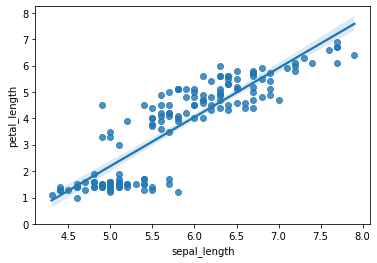

In [13]:
sns.regplot(x="sepal_length", y="petal_length", data=df)
plt.ylim(0,)

(0, 4.536694260485651)

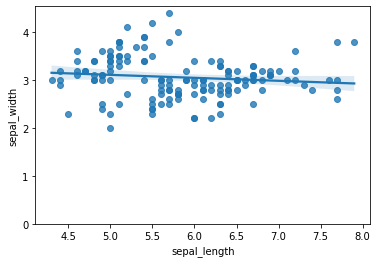

In [14]:
sns.regplot(x="sepal_length",y="sepal_width",data=df)
plt.ylim(0,)

(0, 3.097081597912895)

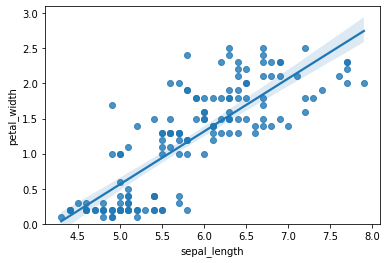

In [15]:
sns.regplot(x='sepal_length',y='petal_width',data=df)
plt.ylim(0,)

In [16]:
df[["petal_length", "sepal_length"]].corr()

,petal_length,sepal_length
petal_length,1.000000,0.871754
sepal_length,0.871754,1.000000


In [17]:
df[['petal_length','petal_width']].corr()

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


In [18]:
df[['petal_length','sepal_width']].corr()

,petal_length,sepal_width
petal_length,1.00000,-0.42844
sepal_width,-0.42844,1.00000


#### visualizing categorical variables using box-plot

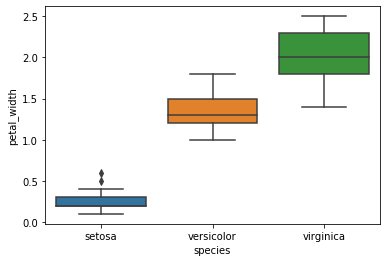

In [20]:
sns.boxplot(x="species", y="petal_width", data=df)

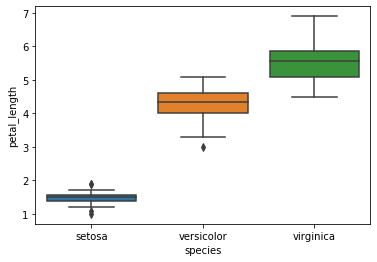

In [21]:
sns.boxplot(x='species',y='petal_length',data=df)

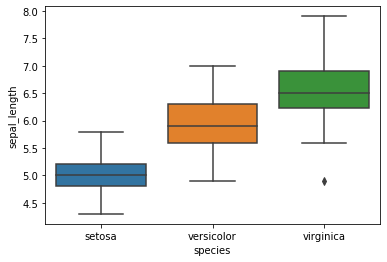

In [22]:
sns.boxplot(x='species',y='sepal_length',data=df)

#### Descriptive statistical analysis

In [23]:
df.describe(include=['object'])

,species
count,150
unique,3
top,setosa
freq,50


In [24]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [25]:
df['species'].value_counts().to_frame()

,species
setosa,50
versicolor,50
virginica,50


In [26]:
species_counts = df['species'].value_counts().to_frame()
species_counts.rename(columns={'species': 'value_counts'}, inplace=True)
species_counts

,value_counts
setosa,50
versicolor,50
virginica,50


In [27]:
species_counts.index.name = 'species'
species_counts

,value_counts
species,
setosa,50
versicolor,50
virginica,50


#### grouping data

In [28]:
df_group_one = df[['species','petal_length','petal_width']]

In [29]:
# grouping results
df_group_one = df_group_one.groupby(['species'],as_index=False).mean()
df_group_one

,species,petal_length,petal_width
0,setosa,1.462,0.246
1,versicolor,4.260,1.326
2,virginica,5.552,2.026


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
df['species'].replace(to_replace=['setosa','versicolor','virginica'], value=[0,1,2],inplace=True)

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

## We'll use Multiple_linear Regression here

In [93]:
Z = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [95]:
lm.fit(Z,df['species'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
Y_hat = lm.predict(Z)

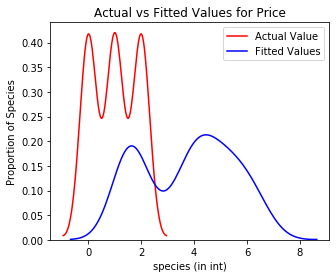

In [97]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['species'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('species (in int)')
plt.ylabel('Proportion of Species')

plt.show()
plt.close()

In [99]:
%%capture
! pip install ipywidgets

In [100]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

### Functions for plotting

In [101]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('species (in int64)')
    plt.ylabel('Proportion of species')

    plt.show()
    plt.close()

In [102]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([0, 3])
    plt.ylabel('species')
    plt.legend()

### Train/Test splitting

In [103]:
y_data = df['species']

In [104]:
x_data=df.drop('species',axis=1)

In [105]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 23
number of training samples: 127


In [107]:
lm.fit(x_train[['petal_length','petal_width','sepal_length','sepal_width']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
yhat_train = lm.predict(x_train[['petal_length','petal_width','sepal_length','sepal_width']])

In [110]:
yhat_train[0:5]

array([-4.44512686e-02,  1.76248037e+00,  1.20086443e+00, -1.55791291e-01,
        1.00395374e-03])

In [114]:
yhat_test = lm.predict(x_test[['petal_length','petal_width','sepal_length','sepal_width']])

In [130]:
yhat_test[0:5]

array([-0.27791474,  0.86952814,  1.17311022, -0.06616966,  1.86044216])

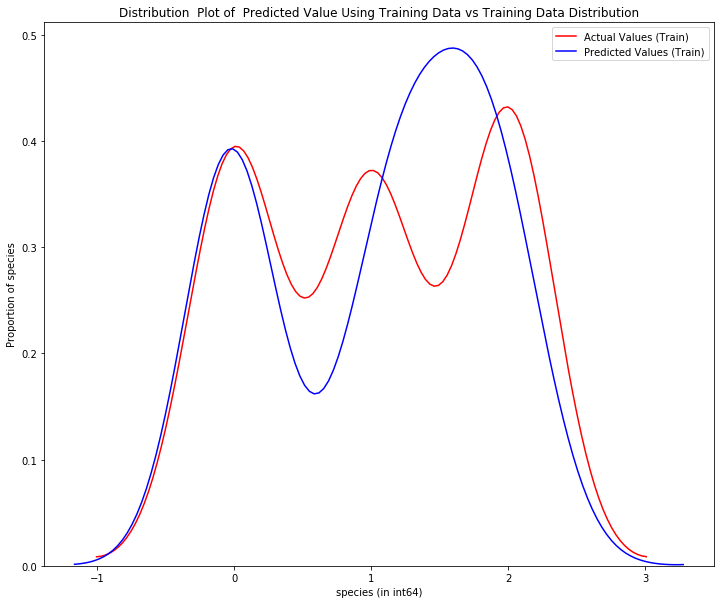

In [115]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

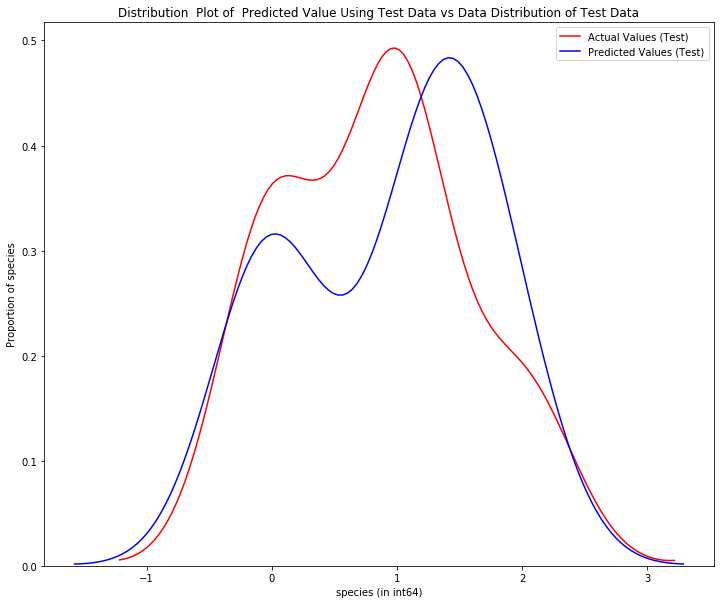

In [116]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

##### we can fit the above anomalies using the Ridge Regression via the regularization(alpha) parameter

### Ridge Regression

In [117]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])
x_test_pr=pr.fit_transform(x_test[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])

In [118]:
from sklearn.linear_model import Ridge

In [120]:
RigeModel=Ridge(alpha=0.1)

In [121]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
yhat = RigeModel.predict(x_test_pr)

In [123]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [0.02741798 0.79505119 1.02355062 0.04593982]
test set : [0 1 1 0]


In [124]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

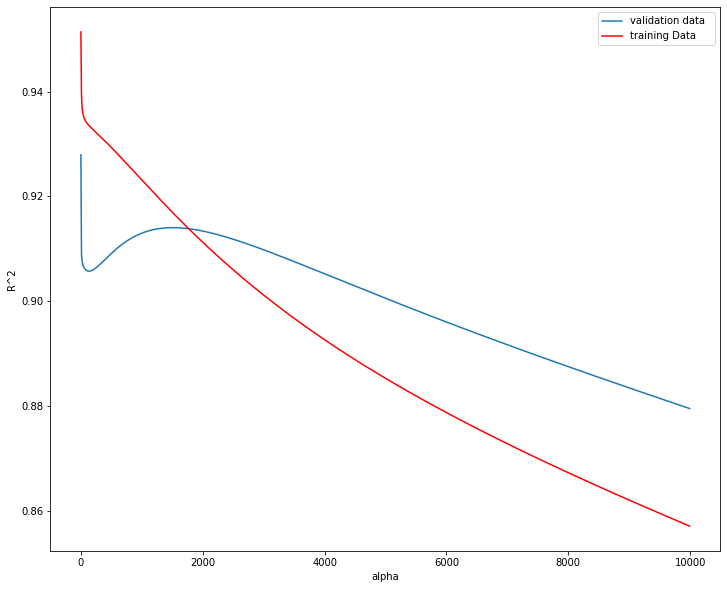

In [126]:
# R2 for diff alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()